In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import layers, models

In [15]:
train_data_path = 'facial_images/train/'
val_data_path = 'facial_images/validation/'

In [16]:
import os

In [19]:
x = 0
for expression in  os.listdir(train_data_path):
    print (expression, " ", len(os.listdir(train_data_path + expression)))
    x = x + len(os.listdir(train_data_path + expression))
print("Total Images: ",x)

angry   3993
disgust   436
fear   4103
happy   7164
neutral   4982
sad   4938
surprise   3205
Total Images:  28821


In [21]:
emotions = []
x = 0
for expression in  os.listdir(val_data_path):
    print (expression, " ", len(os.listdir(val_data_path + expression)))
    data = [expression]
    x = x + len(os.listdir(val_data_path + expression))
    emotions.append(data)
print("Total Images: ",x)

angry   960
disgust   111
fear   1018
happy   1825
neutral   1216
sad   1139
surprise   797
Total Images:  7066


In [22]:
emotions

[['angry'],
 ['disgust'],
 ['fear'],
 ['happy'],
 ['neutral'],
 ['sad'],
 ['surprise']]

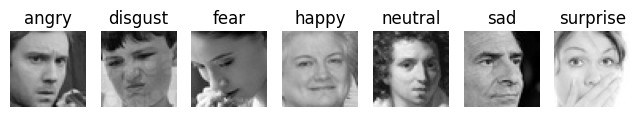

In [26]:
i = 1
plt.figure(figsize=(8,8))
for expression in os.listdir(train_data_path):
    image = load_img((train_data_path + expression) + '/' + os.listdir(train_data_path + expression) [0])
    plt.subplot(1, 7, i)
    plt.imshow(image)
    plt.title(expression)
    plt.axis('off')
    i = i + 1

In [27]:
train_data_gen = ImageDataGenerator()

train_dataset = train_data_gen.flow_from_directory(
    train_data_path,
    shuffle = True,
    target_size = (48,48),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    batch_size = 128)

Found 28821 images belonging to 7 classes.


In [29]:
val_data_gen = ImageDataGenerator()

val_dataset = val_data_gen.flow_from_directory(
    val_data_path,
    shuffle = True,
    target_size = (48,48),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    batch_size = 128)

Found 7066 images belonging to 7 classes.


In [36]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3,3), padding = 'same', activation='relu', input_shape = (48,48,1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (5,5), padding = 'same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (5,5), padding = 'same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(512, (5,5), padding = 'same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
          
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 6, 6, 512)           │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 4,932,487 (18.82 MB)

 Trainable params: 4,929,799 (18.81 MB)

 Non-trainable params: 2,688 (10.50 KB)

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(train_dataset, validation_data=val_dataset, epochs = 50, batch_size = 128, verbose=1)

C:\Users\Salama\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 856s 4s/step - accuracy: 0.2493 - loss: 1.9279 - val_accuracy: 0.3954 - val_loss: 1.5661
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 496s 2s/step - accuracy: 0.4373 - loss: 1.4590 - val_accuracy: 0.5100 - val_loss: 1.2902
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 508s 2s/step - accuracy: 0.5255 - loss: 1.2387 - val_accuracy: 0.5501 - val_loss: 1.1890
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 531s 2s/step - accuracy: 0.5780 - loss: 1.1156 - val_accuracy: 0.5460 - val_loss: 1.1806
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 486s 2s/step - accuracy: 0.6116 - loss: 1.0270 - val_accuracy: 0.5770 - val_loss: 1.1304
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 509s 2s/step - accuracy: 0.6494 - loss: 0.9458 - val_accuracy: 0.5964 - val_loss: 1.0822
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.6880 - loss: 0.8459 - val_accuracy: 0.5889 - val_loss: 1.1241
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 474s 2s/step - accuracy: 0.7139 - loss: 0.7684 - val_accu

In [41]:
model.save('human_emotion_classification.keras')

In [42]:
model = tf.keras.models.load_model('human_emotion_classification.keras')

In [43]:
import cv2

In [281]:
image = cv2.imread('test_images/Happy.jpg')[:,:,0]
image = cv2.resize(image, (48,48))
image = np.invert(np.array([image]))

In [282]:
output = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [283]:
np.argmax(output)

np.int64(3)

In [284]:
data = emotions[np.argmax(output)]

In [285]:
data[0]

'happy'